In [53]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [6]:
# class size paradox
# At many American colleges and universities, the student-to-faculty ratio is
# about 10:1. But students are often surprised to discover that their average
# class size is bigger than 10.

#  The number of students who enjoy a small class is small, 
#  but the number of students in a large class is (ahem!) large

# Suppose that a college offers 65 classes in
# a given semester, with the following distribution of sizes:
# size count
# 5- 9 8
# 10-14 8
# 15-19 14
# 20-24 4
# 25-29 6
# 30-34 12
# 35-39 8
# 40-44 3
# 45-49 2

{7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2}


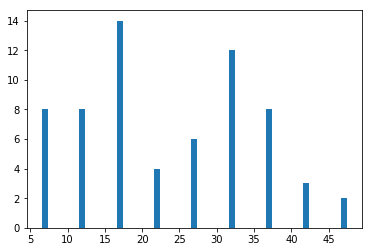

In [67]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }
# the average class size
plt.bar(d.keys(),d.values())
# distribution of number of classes over class sizes
print(d)

In [48]:
def calc_pmf(dictionary):
    freq = dictionary.values()
    freq_sum = sum(freq)
    pmf = [x/freq_sum for x in freq]
    return list(dictionary.keys()),pmf

<Container object of 9 artists>

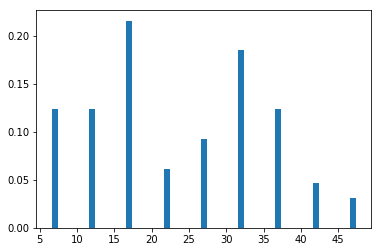

In [124]:
x,y = calc_pmf(d)
plt.bar(x,y)

In [129]:
import math
def calc_mean_std(dictionary):
    x,y = calc_pmf(dictionary)
    df = pd.DataFrame({'class_size':x,'prob':y})
    mean = sum((df['class_size'])*(df['prob']))
    std = math.sqrt(sum(df['prob']*(df['class_size']-mean)**2))
    print('Mean = ',mean,' | standard deviation = ',std)
    return df

calc_mean_std(d)

Mean =  23.692307692307693  | standard deviation =  11.343480780299219


,class_size,prob
0,7,0.123077
1,12,0.123077
2,17,0.215385
3,22,0.061538
4,27,0.092308
5,32,0.184615
6,37,0.123077
7,42,0.046154
8,47,0.030769


In [120]:
# now the average of the class size observed by students
# observed by students can be computed by 
# 7 students in the class size of 7 will think 7 students per class is average class size
# similarly 12 students in class size of 12 will think 12 is the average class size

avg_observed = sum([x*x for x in d.keys()])/sum([x for x in d.keys()])
avg_observed
from collections import defaultdict
new_d = defaultdict()
for x,y in d.items():
    new_d[x]=x*y

# In the biased distribution there are fewer small classes and more large ones.

In [121]:
calc_mean_std(new_d)

Mean =  29.123376623376625  | standard deviation =  10.45107831513399


,class_size,prob
0,7,0.036364
1,12,0.062338
2,17,0.154545
3,22,0.057143
4,27,0.105195
5,32,0.249351
6,37,0.192208
7,42,0.081818
8,47,0.061039


<Container object of 9 artists>

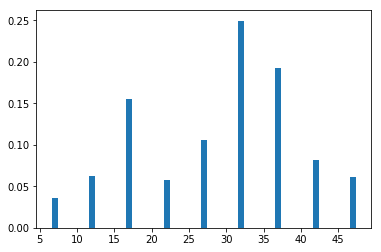

In [125]:
x1,y1 = calc_pmf(new_d)
# biased distribution
plt.bar(x1,y1)

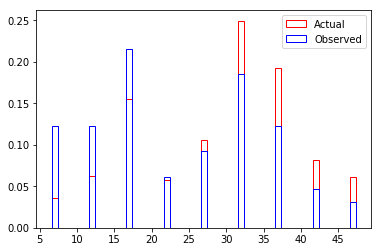

In [128]:
# plot histogram
fig,ax = plt.subplots()
ax.bar(x1,y1,label='Actual',facecolor='None',edgecolor='red')
ax.bar(x,y,label='Observed',facecolor='None',edgecolor='blue')
ax.legend()